<h1>Projekt: Simulace pohybů planet ve 2D</h1>
<h3>Marek Prudil (pru0052)</h3>

<h3>Popis:</h3>
Tento projekt se zabývá simulací pohybu planet (těles) ve 2D prostoru.
Uvažujeme gravitační interakce mezi každou dvojicí těles v podobě
Newtonova gravitačního zákona.

Cílem je implementovat numerickou aproximaci řešení pohybových rovnic
planet a vytvoření vizualizace tohoto pohybu. Pro simulaci bude použita
časová diskretizace, přičemž v každém časovém kroku je uvažováno
konstantní zrychlení $a=\frac{F_{g}}{m}$ způsobené gravitační silou
mezi každou dvojicí planet. $a$ je opět pouze velikost zrychlení, směr
je stejný jako směr síly.

Výstupem projektu je vizualizace pohybu pomocí knihovny Matplotlib,
která zobrazuje pohyb planet v čase a zobrazuje jejich trajektorie.

In [9]:
from planets_project import load_from_json, generate_random_planets, Planet, SystemOfPlanets

<h3>1. Example: Sluneční soustava</h3>

V souboru `test1.py` jsou uložené hmotnosti, počáteční pozice a rychlosti jednotlivých planet sluneční soustavy.

Metoda `draw_current_state` vykreslí aktuální pozice těles, v tomto případě jsme s nimi ještě nehýbali, takže se jedná o počáteční stav.

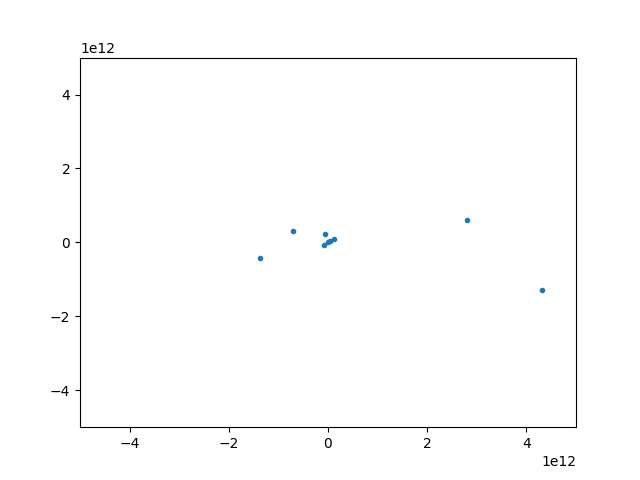

In [10]:
%matplotlib widget
solar_system = SystemOfPlanets(load_from_json('testdata/test1.json'))

solar_system.draw_current_state(5e12)

Metoda `simulate_movement` provede výpočet pozic planet v čase, první parametr je délka simulace a druhý parametr délka časového kroku (v sekundách).

Metoda `draw_trajectories` vykreslí trajektorie všech těles za dobu simulace, parametrem je velikost v metrech (do kladných i záporných hodnot). V tomto případě je velikost nastavená tak, aby šly vidět první 4 planety. Že kód počítá správně, můžeme ověřit empiricky třeba tak, že zadáme délku simulace 350 dní, tak by měla Země udělat skoro jeden oběh Slunce, a Mars zhruba polovinu (doba oběhu 687 dní).

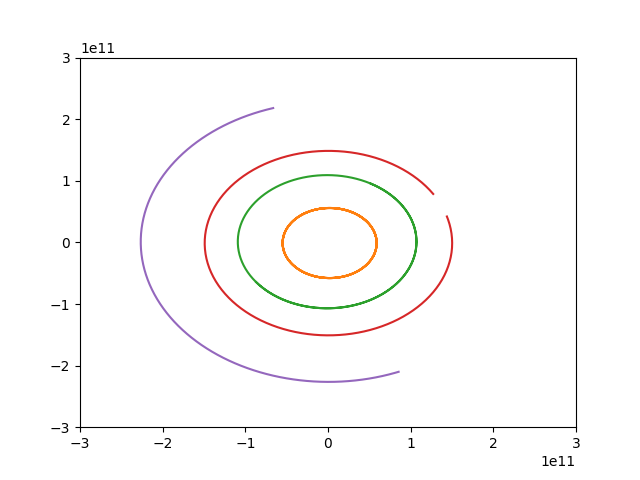

In [11]:
solar_system.simulate_movement(60*60*24*350,60*60*24)

solar_system.draw_trajectories(3e11)

Nyní necháme simulaci "běžet 10 let" a vykreslíme trajektorie všech planet. Vidíme, že Jupiter s dobou oběhu 12 let téměř dokončil jeden oběh.

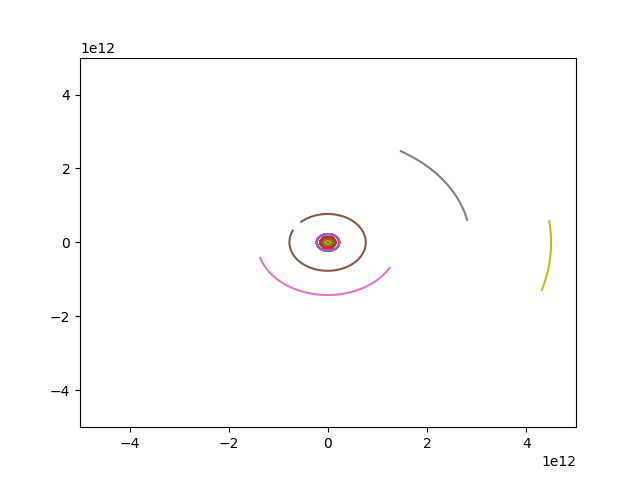

In [12]:
solar_system.simulate_movement(60*60*24*365*10, 60*60*24)
solar_system.draw_trajectories(5e12)

Metoda `show_animation` zobrazí animaci pohybu planet. (opět parametr size)

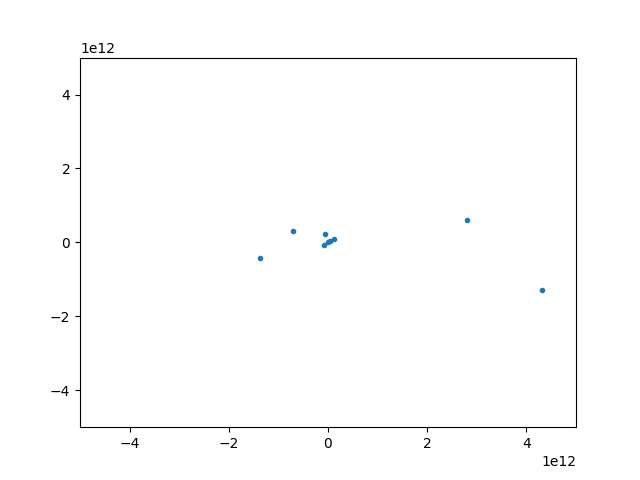

In [13]:
solar_system.show_animation(5e12)

<h3>2. Example: 3 tělesa</h3>

V souboru `test2.py` jsou uložená počáteční data tří těles s podobnou hmotností a malými počátečními rychlostmi.

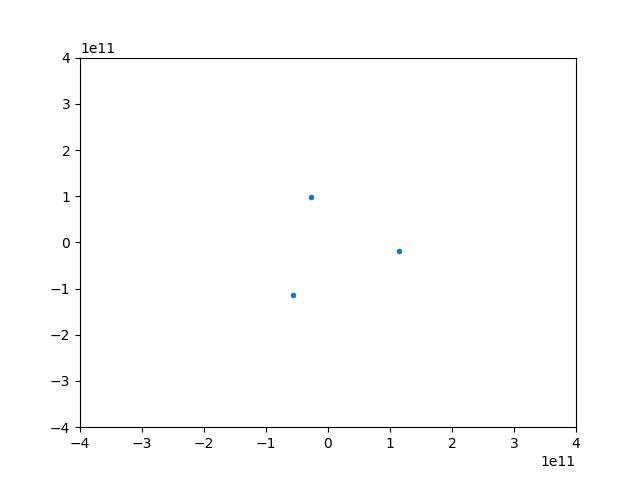

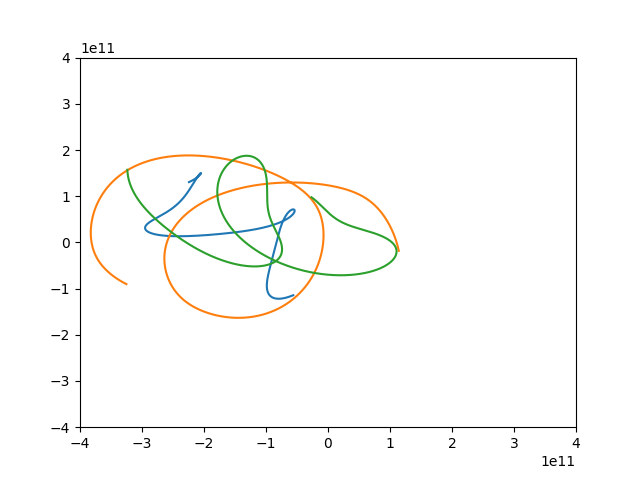

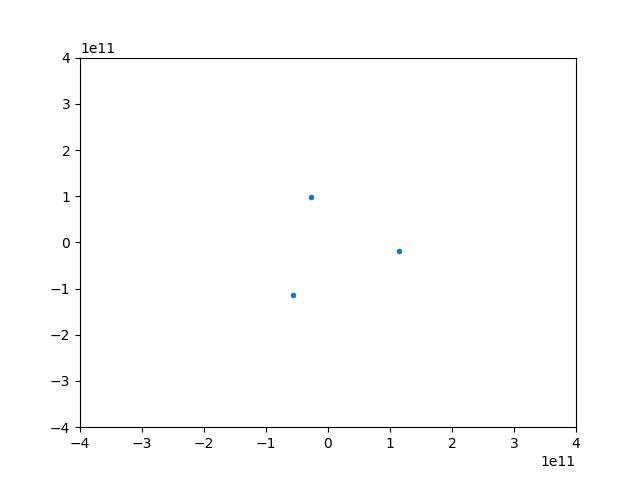

In [14]:
three_body = SystemOfPlanets(load_from_json('testdata/test2.json'))
three_body.draw_current_state(4e11)
three_body.simulate_movement(3e9, 1e5)

three_body.draw_trajectories(4e11)

three_body.show_animation(4e11)

<h3>3. Example: Náhodné generování</h3>

Funkce `generate_random_planets` vytvoří list planet s náhodně vygenerovanými počátečními podmínkami. Parametr je počet planet, které chceme vygenerovat. Pozice v počátečním stavu se vždy vejde do okna s velikostí 1e11.

In [15]:
generate_random_planets(4)

[Planet(mass=4.59564131664583e+26, position=array([ 3.46899461e+09, -4.71173783e+10]), velocity=array([ -16.86217768, -865.44345194])),
 Planet(mass=7.912766976407717e+26, position=array([-2.01423843e+10, -1.52910296e+10]), velocity=array([ 505.66400549, -993.36733855])),
 Planet(mass=4.027239287739008e+26, position=array([3.05717786e+10, 7.00975954e+10]), velocity=array([ 430.20980851, -637.67722302])),
 Planet(mass=9.600301279674209e+26, position=array([ 1.28128904e+10, -3.96021156e+10]), velocity=array([-825.37176986,  759.37171617]))]

Při každém spuštění buňky dostaneme jinou počáteční konfiguraci.

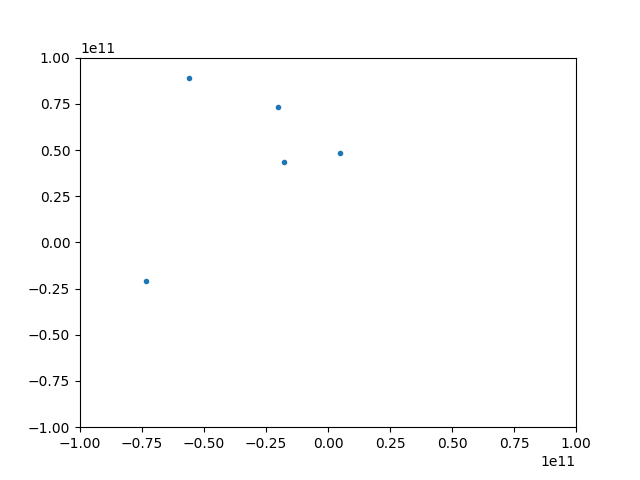

In [27]:
random_system = SystemOfPlanets(generate_random_planets(5))

random_system.draw_current_state(1e11)

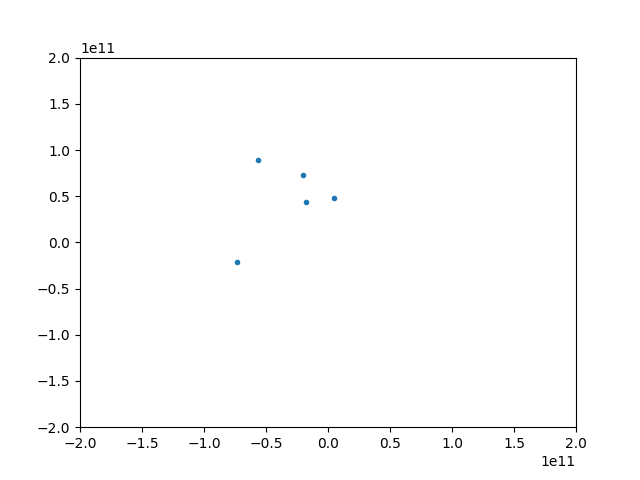

In [28]:
random_system.simulate_movement(1e8,1e5)
random_system.show_animation(2e11)


/home/marek/Documents/VVP/pru0052_vvp_projekt/planets_project.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes = plt.subplots()


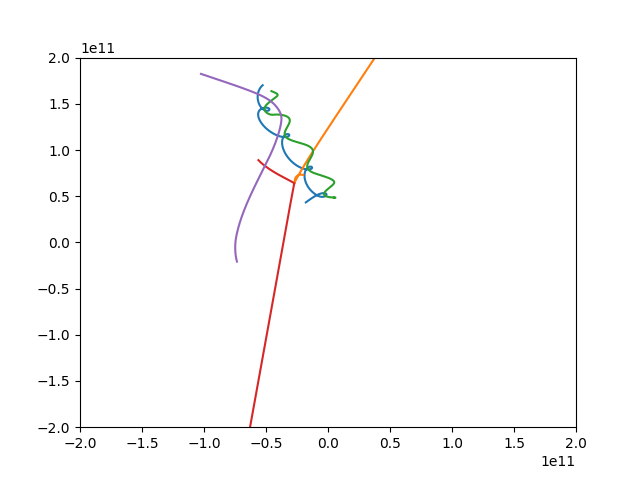

In [29]:
random_system.draw_trajectories(2e11)